# Praca domowa 5

Testowanie dwóch metod klasteryzujących: `KMeans` i `KMedoids`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings('ignore')

X = pd.read_csv('https://raw.githubusercontent.com/mini-pw/2021L-WUM/main/Prace_domowe/Praca_domowa5/clustering.csv', header=None)
X

,0,1
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186
...,...,...
395,22.423142,50.252807
396,-58.534367,-78.679387
397,36.446549,-11.841887
398,-101.284845,85.096034


### Zbiór danych

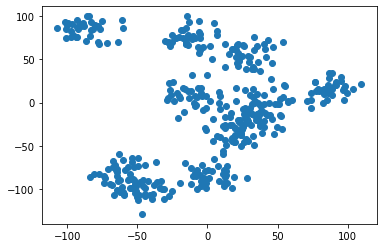

In [2]:
plt.scatter(X[0], X[1])
plt.show()

## Algorytmy klasteryzujące

In [3]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

[KMedoids](https://scikit-learn-extra.readthedocs.io/en/latest/modules/cluster.html#k-medoids) is related to the KMeans algorithm. While KMeans tries to minimize the within cluster sum-of-squares, KMedoids tries to minimize the sum of distances between each point and the medoid of its cluster.

## Wybór liczby klastrów
### [Silhouette Coefficient](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)

In [4]:
from sklearn.metrics import silhouette_score
max_clusters = 15
scores = [[],[]]
for k in range(2, max_clusters):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    
    labels_kmeans = kmeans.fit_predict(X)
    labels_kmedoids = kmedoids.fit_predict(X)
    
    wcss_kmeans = silhouette_score(X, labels_kmeans)
    wcss_kmedoids = silhouette_score(X, labels_kmedoids)
    
    scores[0].append(wcss_kmeans)
    scores[1].append(wcss_kmedoids)

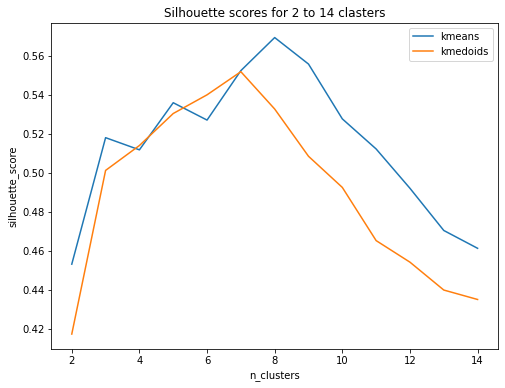

In [5]:
plt.figure(figsize=(8,6))
x = range(2,max_clusters)

plt.plot(x, scores[0], label = 'kmeans')
plt.plot(x, scores[1], label = 'kmedoids')

plt.xlabel('n_clusters')
plt.ylabel('silhouette_score')

plt.title(f"Silhouette scores for 2 to {max_clusters - 1} clasters")
plt.legend()

plt.show()

 A higher Silhouette Coefficient score relates to a model with better defined clusters.

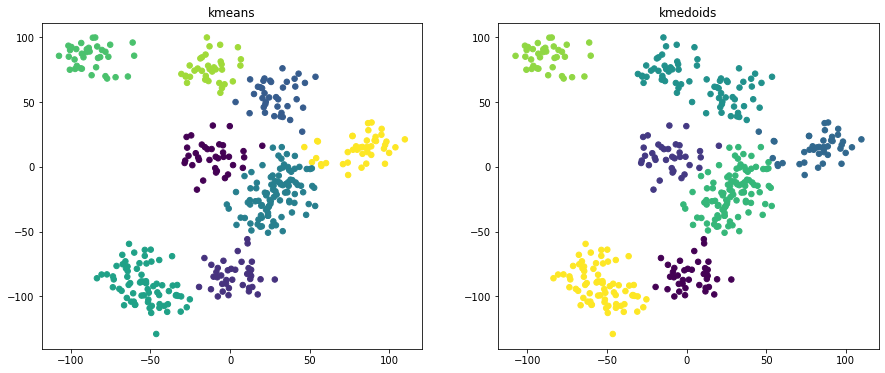

In [6]:
(ax1, ax2) = plt.figure(figsize=(15,6)).subplots(1,2)

kmeans = KMeans(n_clusters=scores[0].index(max(scores[0]))+2, random_state=0)
kmedoids = KMedoids(n_clusters=scores[1].index(max(scores[1]))+2, random_state=0)

labels_kmeans = kmeans.fit_predict(X)
labels_kmedoids = kmedoids.fit_predict(X)

ax1.scatter(X[0], X[1], c=labels_kmeans, s=30)
ax2.scatter(X[0], X[1], c=labels_kmedoids, s=30)

ax1.set_title('kmeans')
ax2.set_title('kmedoids')

plt.show()

### [Calinski-Harabasz Index](https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index)

In [7]:
from sklearn.metrics import calinski_harabasz_score
scores2 = [[],[]]
for k in range(2, max_clusters):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    
    labels_kmeans = kmeans.fit_predict(X)
    labels_kmedoids = kmedoids.fit_predict(X)
    
    wcss_kmeans = calinski_harabasz_score(X, labels_kmeans)
    wcss_kmedoids = calinski_harabasz_score(X, labels_kmedoids)
    
    scores2[0].append(wcss_kmeans)
    scores2[1].append(wcss_kmedoids)

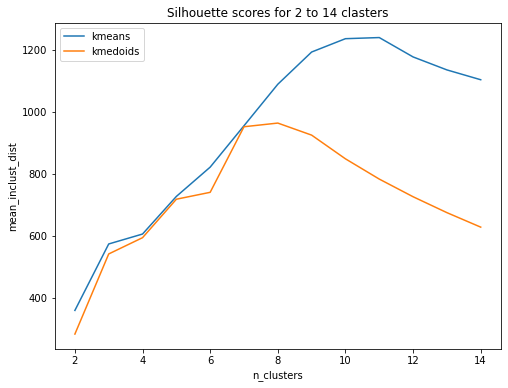

In [8]:
plt.figure(figsize=(8,6))
plt.plot(x, scores2[0], label = 'kmeans')
plt.plot(x, scores2[1], label = 'kmedoids')

plt.xlabel('n_clusters')
plt.ylabel('mean_inclust_dist')

plt.title(f"Silhouette scores for 2 to {max_clusters - 1} clasters")
plt.legend()

plt.show()

A higher Calinski-Harabasz score relates to a model with better defined clusters.

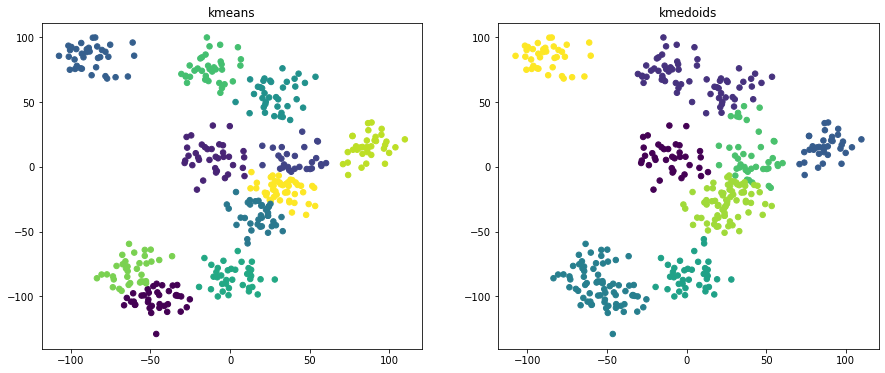

In [9]:
(ax1, ax2) = plt.figure(figsize=(15,6)).subplots(1,2)

kmeans = KMeans(n_clusters=scores2[0].index(max(scores2[0]))+2, random_state=0)
kmedoids = KMedoids(n_clusters=scores2[1].index(max(scores2[1]))+2, random_state=0)

labels_kmeans = kmeans.fit_predict(X)
labels_kmedoids = kmedoids.fit_predict(X)

ax1.scatter(X[0], X[1], c=labels_kmeans, s=30)
ax2.scatter(X[0], X[1], c=labels_kmedoids, s=30)

ax1.set_title('kmeans')
ax2.set_title('kmedoids')

plt.show()

## Podsumowanie
Użwając dwóch różnych metryk uzyskaliśmy w obu algorytmach różne liczby klastrów. W przypadku Silhouette Coefficient optymalne liczby klastrów wyznaczone zostały raczej jednoznacznie, natomiast przy Calinski-Harabasz Index różnice były dużo mniejsze.